In [ ]:
# 6.4 使用scikit-learn提供的適應提升處理迴歸問題(AdaBoostRegressor)

In [1]:
# --- 第 1 部分 ---
# 載入函式庫與資料集
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

diabetes = load_diabetes()

train_size = 400
train_x = diabetes.data[:train_size]
train_y = diabetes.target[:train_size]
test_x = diabetes.data[train_size:]
test_y = diabetes.target[train_size:]

np.random.seed(123456)

# --- 第 2 部分 ---
# 初始化模型
ensemble_size = 1000
ensemble = AdaBoostRegressor(n_estimators=ensemble_size)

# --- 第 3 部分 ---
# 訓練模型
ensemble.fit(train_x, train_y)
predictions = ensemble.predict(test_x)

# --- 第 4 部分 ---
# 評估模型
r2 = metrics.r2_score(test_y, predictions)
mse = metrics.mean_squared_error(test_y, predictions)

# --- 第 5 部分 ---
# 顯示準確率
print('AdaBoosting:')
print('R-squared: %.2f' % r2)
print('MSE: %.2f' % mse)


AdaBoosting:
R-squared: 0.56
MSE: 2417.89


In [2]:
ensemble.estimator_weights_.shape 

(1000,)

In [3]:
ensemble.estimator_weights_ # 獲得每個若學習器的權重

array([1.13047236, 0.97748046, 0.7023304 , 0.89164996, 0.72362588,
       0.83533839, 0.6281637 , 0.63339319, 0.42535439, 0.25408172,
       0.53797447, 0.60712495, 0.7123206 , 0.39090442, 0.64132005,
       0.61436246, 0.26393798, 0.43910002, 0.91582642, 0.02744008,
       0.78607459, 0.65070413, 0.15981856, 0.24155322, 0.73346565,
       1.11152773, 0.64134064, 0.11488684, 0.46415328, 0.73410031,
       0.60008097, 0.42626369, 0.24566316, 0.73744152, 0.43899619,
       0.65479346, 0.95846587, 0.36573681, 0.39556375, 0.45879476,
       0.46061792, 0.50109707, 0.83368342, 0.68536857, 0.7170949 ,
       0.09941953, 0.57537825, 0.80849844, 0.67267106, 0.79151255,
       0.48073551, 0.59150801, 0.32898807, 0.84861423, 0.15175279,
       0.5406686 , 1.0107877 , 0.45150593, 0.64153399, 0.6232815 ,
       1.13695395, 0.49473457, 0.10852699, 0.7997377 , 0.39201003,
       0.94170488, 0.70275441, 0.64708066, 1.17222776, 0.55136375,
       0.66788589, 0.50744255, 0.36364692, 0.54385232, 0.73470

In [4]:
ensemble.estimator_errors_.shape

(1000,)

In [5]:
ensemble.estimator_errors_   # 獲得每個若學習器的誤差

array([0.24407394, 0.273392  , 0.33129575, 0.29076945, 0.32659504,
       0.30251748, 0.34792703, 0.34674154, 0.3952362 , 0.4368191 ,
       0.3686589 , 0.35271531, 0.32908627, 0.4034996 , 0.3449482 ,
       0.35106471, 0.43439591, 0.39195544, 0.28580905, 0.49314041,
       0.31301215, 0.34283088, 0.46013019, 0.43990362, 0.32443467,
       0.24758618, 0.34494355, 0.47130984, 0.38600101, 0.32429559,
       0.35432517, 0.39501888, 0.43889123, 0.32356387, 0.39198018,
       0.34191016, 0.27718546, 0.40957156, 0.40237866, 0.38727178,
       0.38683925, 0.37728289, 0.30286679, 0.33506415, 0.32803303,
       0.47516557, 0.35999675, 0.30821056, 0.337899  , 0.31184399,
       0.38207846, 0.35628892, 0.41848686, 0.29972364, 0.46213444,
       0.36803206, 0.26682573, 0.38900278, 0.34489986, 0.34903549,
       0.24288006, 0.37877886, 0.47289485, 0.31008163, 0.40323352,
       0.28055609, 0.33120182, 0.3436477 , 0.23645254, 0.36554807,
       0.33897039, 0.37579324, 0.41007704, 0.36729189, 0.32416

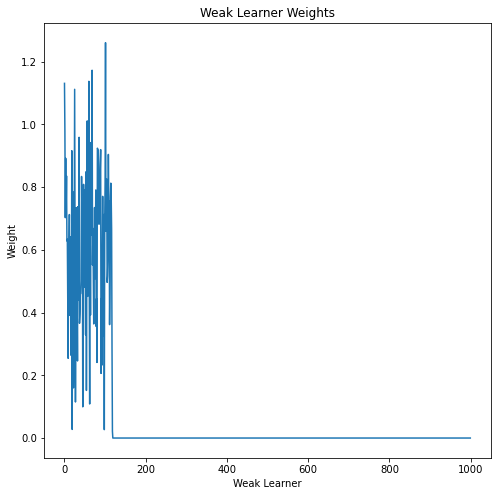

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8))
plt.plot(list(range(len(ensemble.estimator_weights_))), ensemble.estimator_weights_)
plt.title("Weak Learner Weights")
plt.xlabel("Weak Learner")
plt.ylabel("Weight")
plt.show()